Importing pacakegs required for the project.
Using read_csv() we read the csv file which contains the dataset.
Using pandas DataFrame method to convert file into the dataframe

In [77]:
import pandas as pd
import numpy as np

train = pd.DataFrame(pd.read_csv('train.csv'))
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary
Survived: 0 = No, 1 = Yes
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sibsp: # of siblings / spouses aboard the Titanic
parch: # of parents / children aboard the Titanic
ticket: Ticket number
cabin: Cabin number
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

The shape() returns the number of rows and columns present in the data set.

In [78]:
train.shape

(891, 12)

The isnull() specifies the no of rows having null values and then using sum() we add all the values to give a final result

In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We are now removing the columns having null values greater than 35% ...thus only cabin column is dropped

In [80]:
drop_col = train.isnull().sum()[train.isnull().sum()>(35/100 * train.shape[0])]
drop_col

Cabin    687
dtype: int64

We dropped the columns cabin using index

In [81]:
drop_col.index

Index(['Cabin'], dtype='object')

In [82]:
train.drop(drop_col.index, axis=1, inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [83]:
train.fillna(train.mean(), inplace =True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [84]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [85]:
train['Embarked'].fillna('S',inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [87]:
train['FamilySize'] = train['SibSp']+train['Parch']
train.drop(['SibSp' , 'Parch'], axis=1, inplace =True)
train.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


Family Size does not have any correlance with survial rate

In [88]:
train['Alone'] = [0 if train ['FamilySize'][i]>0 else 1 for i in train.index]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [89]:
train.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

A person travelling alone has a way less chance of survival.
Reason being that people travelling with family may be belonging to rich class therfore prioritized over others.

In [90]:
train[['Alone', 'Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


We can conclude from above person travelling with family had a higher average fare as compared to someone travelling alone.

In [91]:
train['Sex'] = [0 if train['Sex'][i]=='male' else 1 for i in train.index]
train.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

We can se from above correlation that women had a higher rate of survival meaning that women were priortized over males.

In [92]:
train.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [93]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

We can see people who embarked from 'C' that is Cherbourg had a higher survival rate as compared to other embarkation points.

In [94]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

We can see people from 1st class had a higher chance of survival as compared to 3rd and 2nd class indicating that rich people were prioritized.

Using above data we can now visualize the dataset and its conclusions

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [72]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

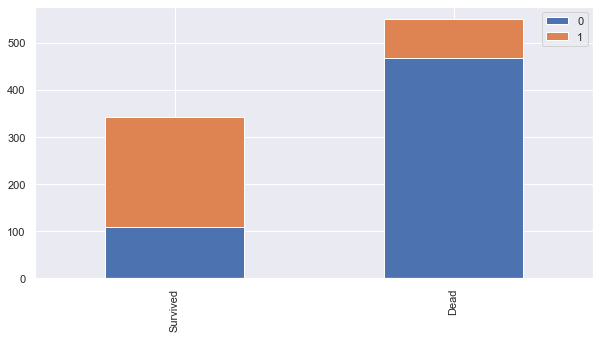

In [73]:
bar_chart('Sex')

We can now see visual representation of the above conclusion that women survied more as compared to men. 

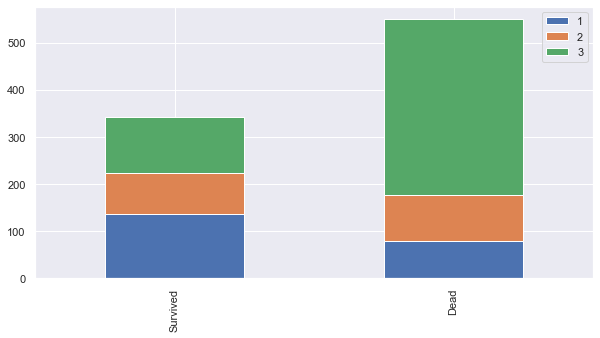

In [74]:
bar_chart('Pclass')

We can now see visual representation of people travelling in first class had a higher survival rate.

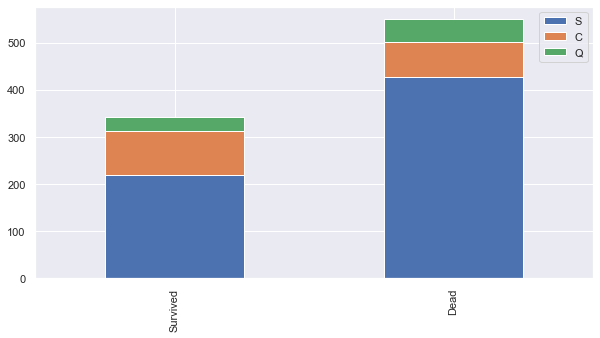

In [76]:
bar_chart('Embarked')

We can now see a visual representation of people who boarded from cherbourg had a higher rate of survival.

Conclusions
Females or Women were prioritized over Males or Men.
People travelling in 1st class had a higher survival rate as compared to 3rd class.
Passengers travelling alongside their family had a higher chance of survival as compared to people travelling alone.
People travelling from cherbourg had a higher chance of survival.
